# Eurobarometer data with pandas and matplotlib

This notebook uses data from the [Eurobarometer Interactive open data portal](http://ec.europa.eu/COMMFrontOffice/publicopinion/index.cfm/Chart/index). 

Use the interactive data function to navigate to the data you wish, then select Excel as export format. Make sure you select the right country. It should look like this: 

![select](selectdata.png)



In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7# Make figures a little bigger

You can just read the Excel file straight into Pandas as a data-frame. However, if you wish to create time series, it's nice to parse it as datetime data. Then, you can set the dates as index of the dataframe.

In this example, I downladed the data for Sweden on life satisfaction. 

In [28]:
df = pd.read_excel('SELSEurobarometer19962016.xlsx') # Read file 
pd.to_datetime(df.Date, format='%Y%m%d') # Parse date as datetime
ts = df.set_index(df.Date) # set datetime as index
ts.head()

,Date,Very satisfied,Fairly satisfied,Not very satisfied,Not at all satisfied,DK - Don't know
Date,,,,,,
1996-02-27,1996-02-27,0.411368,0.527938,0.051060,0.008671,0.000963
1997-03-26,1997-03-26,0.433000,0.527000,0.027000,0.009000,0.004000
1998-04-07,1998-04-07,0.359686,0.567606,0.055757,0.008054,0.008898
1999-10-15,1999-10-15,0.357638,0.587406,0.042605,0.005394,0.006958
2000-04-05,2000-04-05,0.348987,0.594360,0.043319,0.011337,0.001997


In [29]:
ts.index # Here you can verify that the data was parsed correctly as 'datetime64'

DatetimeIndex(['1996-02-27', '1997-03-26', '1998-04-07', '1999-10-15',
               '2000-04-05', '2000-11-14', '2001-04-12', '2001-10-13',
               '2002-03-29', '2002-10-01', '2003-10-01', '2004-10-02',
               '2005-05-09', '2005-10-10', '2006-03-27', '2006-09-06',
               '2007-04-10', '2007-09-22', '2008-03-25', '2008-10-01',
               '2009-06-01', '2009-10-23', '2010-05-05', '2010-11-11',
               '2011-05-06', '2011-11-05', '2012-05-12', '2012-11-03',
               '2013-05-10', '2013-11-02', '2014-05-31', '2014-11-08',
               '2015-05-16', '2015-11-07', '2016-05-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

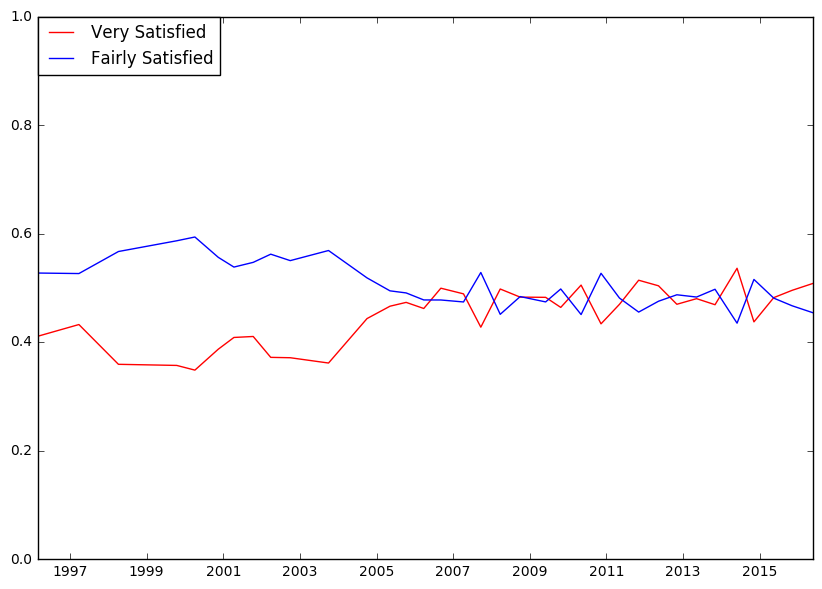

In [40]:
# Here I plot the two values "Very Satisfied" and "Fairly satisfied". 
plt.plot(ts['Very satisfied'], color='r', linestyle='-', label='Very Satisfied')
plt.plot(ts['Fairly satisfied'],  color='b', linestyle='-', label='Fairly Satisfied')
plt.ylim(0,1)
plt.legend(loc=2, borderaxespad=0.)

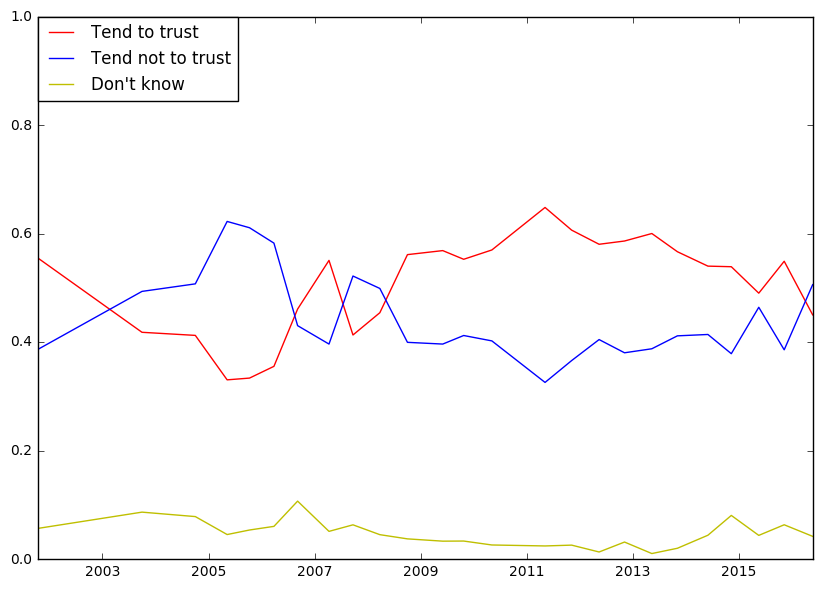

In [14]:
# In this example I use Trust in Goverment for Sweden as a similar example as above. 
dftrust = pd.read_excel('trustgovernmenteurobarometersweden.xlsx')
pd.to_datetime(dftrust.Date, format='%Y%m%d')
tstrust = dftrust.set_index(dftrust.Date)
tstrust.head()
plt.plot(tstrust['Tend to trust'], color='r', linestyle='-', label='Tend to trust')
plt.plot(tstrust['Tend not to trust'],  color='b', linestyle='-', label='Tend not to trust')
plt.plot(tstrust["DK - Don't know"],  color='y', linestyle='-', label="Don't know")
plt.ylim(0,1)
plt.legend(loc=2, borderaxespad=0.)